In [109]:
import pandas as pd

# 데이터 확인

In [110]:
행정동=pd.read_excel("./행정동.xlsx")

In [111]:
행정동.drop(["Unnamed: 0"],axis=1,inplace=True)

In [112]:
for col in ["노인수","장애인수","기초수급자"]:
    행정동[f'{col}(%)']=행정동[col]/행정동["인구수"]

In [113]:
행정동

,GU_NAME,ADM_NM,동면적(k㎡),인구수,인구밀도(명/km²),동단위우량,동단위시우량,침수횟수,경사도,양호비율,...,4분위소득가구비율(%),5분위소득가구비율(%),월_평균_소득_금액,연간_총지출,노인수,장애인수,기초수급자,노인수(%),장애인수(%),기초수급자(%)
0,종로구,사직동,1.23,9371,7618.699187,9.062665,0.379032,0,0.153750,0.245283,...,0.180704,0.302640,5007768,223170702000,1808,277,125,0.192936,0.029559,0.013339
1,종로구,삼청동,1.49,2616,1755.704698,10.978350,0.459153,0,0.250000,0.832402,...,0.184304,0.133175,3442534,11857714000,626,108,45,0.239297,0.041284,0.017202
2,종로구,부암동,2.27,9460,4167.400881,16.725406,0.699515,2,0.314583,0.906250,...,0.212384,0.245588,3647449,6377388000,1814,318,174,0.191755,0.033615,0.018393
3,종로구,평창동,8.87,17743,2000.338219,65.354340,2.733348,2,0.229615,0.974132,...,0.199565,0.367983,4504006,9726599000,3495,513,144,0.196979,0.028913,0.008116
4,종로구,무악동,0.36,8045,22347.222220,2.652487,0.110936,0,0.346667,1.000000,...,0.181028,0.381708,5136717,8331265000,1476,322,206,0.183468,0.040025,0.025606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,강동구,성내2동,0.67,23414,34946.268660,5.893320,0.239663,19,0.055000,0.886957,...,0.202741,0.118160,2824592,28749704000,4469,1071,930,0.190869,0.045742,0.039720
401,강동구,성내3동,0.71,22984,32371.830990,6.245160,0.253972,12,0.072143,0.633929,...,0.218861,0.173423,2897346,27366893000,4098,876,706,0.178298,0.038113,0.030717
402,강동구,길동,1.61,45225,28090.062110,14.161560,0.575907,9,0.176154,0.608911,...,0.214678,0.192221,2840603,48142577000,8478,1983,1637,0.187463,0.043847,0.036197
403,강동구,둔촌2동,1.56,24212,15520.512820,13.721760,0.558022,10,0.170909,0.797872,...,0.235011,0.285108,3414406,17302683000,4250,935,536,0.175533,0.038617,0.022138


## 데이터

In [114]:
행정동.columns

Index(['GU_NAME', 'ADM_NM', '동면적(k㎡)', '인구수', '인구밀도(명/km²)', '동단위우량', '동단위시우량',
       '침수횟수', '경사도', '양호비율', '녹지면적', '하천거리(km)', '빗물펌프장까지의거리(m)', '제방', '수문',
       '암거', '도로_건물_면적', '병원', '경찰', '소방서', '노후건물개수', '1분위소득가구비율(%)',
       '2분위소득가구비율(%)', '3분위소득가구비율(%)', '4분위소득가구비율(%)', '5분위소득가구비율(%)',
       '월_평균_소득_금액', '연간_총지출', '노인수', '장애인수', '기초수급자', '노인수(%)', '장애인수(%)',
       '기초수급자(%)'],
      dtype='object')

In [115]:
#침수여부
행정동["침수여부"]=0
행정동.loc[행정동["침수횟수"]>0,"침수여부"]=1
target="침수여부"
# feature=['인구밀도(명/km²)','동단위시우량',
#        '경사도', '양호비율', '녹지면적', '하천거리(km)', '빗물펌프장까지의거리(m)', '제방', '수문',
#        '암거', '도로_건물_면적', '병원', '경찰', '소방서', '노후건물개수', '1분위소득가구비율(%)',
#        '2분위소득가구비율(%)', '3분위소득가구비율(%)', '4분위소득가구비율(%)', '5분위소득가구비율(%)',
#        '월_평균_소득_금액', '연간_총지출','노인수(%)', '장애인수(%)','기초수급자(%)']
feature=['인구밀도(명/km²)','동단위시우량',
       '경사도', '양호비율', '녹지면적', '하천거리(km)', '빗물펌프장까지의거리(m)', '제방', '수문',
       '암거', '도로_건물_면적', '병원', '경찰', '소방서', '노후건물개수','월_평균_소득_금액', '연간_총지출','노인수(%)', '장애인수(%)','기초수급자(%)']

In [116]:
행정동["침수여부"].value_counts()

침수여부
1    266
0    139
Name: count, dtype: int64

In [117]:
행정동[feature].corr().abs().style.background_gradient(cmap="PuBu")

,인구밀도(명/km²),동단위시우량,경사도,양호비율,녹지면적,하천거리(km),빗물펌프장까지의거리(m),제방,수문,암거,도로_건물_면적,병원,경찰,소방서,노후건물개수,월_평균_소득_금액,연간_총지출,노인수(%),장애인수(%),기초수급자(%)
인구밀도(명/km²),1.000000,0.576318,0.201239,0.034159,0.416995,0.265094,0.161041,0.377759,0.249874,0.434044,0.188263,0.066621,0.171733,0.073428,0.015522,0.158803,0.079458,0.094909,0.009899,0.008916
동단위시우량,0.576318,1.000000,0.187228,0.079986,0.472888,0.226408,0.255404,0.513902,0.256726,0.572135,0.247195,0.000993,0.160367,0.133782,0.124935,0.027199,0.026244,0.014866,0.039445,0.050405
경사도,0.201239,0.187228,1.000000,0.462013,0.253957,0.086110,0.421298,0.026924,0.162925,0.013836,0.020165,0.133889,0.002980,0.076044,0.071153,0.145967,0.042570,0.093642,0.042509,0.059364
양호비율,0.034159,0.079986,0.462013,1.000000,0.188715,0.070532,0.258026,0.055466,0.096146,0.042608,0.030024,0.145300,0.081339,0.137392,0.019314,0.132830,0.077502,0.079133,0.022468,0.027240
녹지면적,0.416995,0.472888,0.253957,0.188715,1.000000,0.102450,0.352629,0.341744,0.128798,0.427500,0.240711,0.025368,0.124194,0.138855,0.091270,0.051784,0.032430,0.011191,0.034081,0.002616
하천거리(km),0.265094,0.226408,0.086110,0.070532,0.102450,1.000000,0.038129,0.225078,0.142853,0.137815,0.055611,0.071366,0.077252,0.063861,0.027456,0.024562,0.082419,0.087509,0.026973,0.017114
빗물펌프장까지의거리(m),0.161041,0.255404,0.421298,0.258026,0.352629,0.038129,1.000000,0.118591,0.115803,0.033325,0.015789,0.111482,0.082600,0.026608,0.048452,0.160973,0.001325,0.223122,0.137161,0.101540
제방,0.377759,0.513902,0.026924,0.055466,0.341744,0.225078,0.118591,1.000000,0.471410,0.706948,0.445059,0.004744,0.116056,0.086325,0.063991,0.119485,0.037847,0.006214,0.014282,0.027611
수문,0.249874,0.256726,0.162925,0.096146,0.128798,0.142853,0.115803,0.471410,1.000000,0.255489,0.180696,0.013002,0.030236,0.010732,0.031287,0.060594,0.017563,0.017267,0.040924,0.034393
암거,0.434044,0.572135,0.013836,0.042608,0.427500,0.137815,0.033325,0.706948,0.255489,1.000000,0.348635,0.117503,0.161607,0.134982,0.161017,0.272525,0.068680,0.117221,0.103244,0.102958


#### 1-1. RandomForest

In [118]:
import sklearn.ensemble as skens
import sklearn.model_selection as skmod
import sklearn.preprocessing as skpre
import numpy as np
import scipy as sp
np.random.seed(10)

In [119]:
# 제약없이 Random_Forest
train,test=skmod.train_test_split(행정동[[target]+feature],train_size=0.7,random_state=10,stratify=행정동[target])
RT_model=skens.RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=10,n_jobs=-1)
RT_model.fit(X=train[feature],y=train[target])

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=10)

In [120]:
RT_model.score(X=test[feature],y=test[target])

0.7213114754098361

In [121]:
# 각각의 깊이
sum_tree_depth=[RT_model.estimators_[i].tree_.max_depth for i in range(len(RT_model.estimators_))]
max_depth=max(sum_tree_depth)

In [122]:
#랜덤시드 고정
for i in range(40):
    eval(f'np.random.seed({i+1})')

In [124]:
# 40번의 Random_Forest_model평가
acc_list=[]
best_params=[]

for i in range(11,11+40):
    sub_train,sub_test=skmod.train_test_split(행정동,train_size=0.7,random_state=i,stratify=행정동[target]) #학습데이터


    params={"max_depth":sp.stats.randint(low=2,high=max_depth)}
    grid_tree=skens.RandomForestClassifier(criterion="entropy",random_state=10)
    sub_Random_model=skmod.RandomizedSearchCV(estimator=grid_tree,
                                            param_distributions=params,
                                            scoring="accuracy",
                                            random_state=10,
                                            cv=3, n_iter=100,n_jobs=-1)
    sub_Random_model.fit(X=sub_train[feature],y=sub_train[target])
    tree_model=sub_Random_model.best_estimator_
    # tree_model.fit(X=sub_train[feature],y=sub_train[target]) #학습
    acc_list.append(tree_model.score(X=sub_test[feature],y=sub_test[target]))
    best_params.append(sub_Random_model.best_params_)

In [126]:
나무결과=pd.DataFrame(acc_list).rename(columns={0:'accuracy'})
나무결과["테스트_오차율"]=1-나무결과["accuracy"]
나무결과.sort_values(by="테스트_오차율",inplace=True)

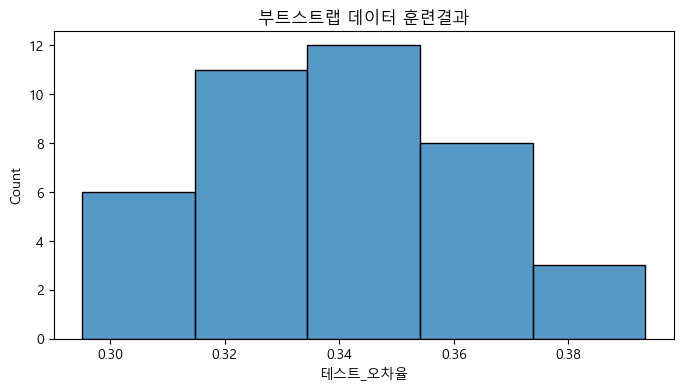

In [128]:
import seaborn as sb
plt.figure(figsize=(8,4))
plt.title("부트스트랩 데이터 훈련결과")
sb.histplot(x=나무결과["테스트_오차율"],bins=5)
plt.show()
plt.ylabel("모델 수")
plt.close()

#### 1-2. Logistic Regression

In [ ]:
import statsmodels.api as sm # Logistic Regression
import sklearn.preprocessing as skpre # Preprocessing

In [ ]:
import matplotlib.pyplot as plt # 시각화 해야함
import seaborn as sb
plt.rcParams["font.family"]="Malgun Gothic"

In [ ]:
# # Pairplot
# plt.figure()
# sb.pairplot(행정동[feature])
# plt.show()
# plt.close()

In [ ]:
# 박스플롯으로 확인하기 위해 스케일링
minmax=skpre.MinMaxScaler()
minmax.fit(X=행정동[feature])

MinMaxScaler()

In [ ]:
# minmax scale
pre_행정동=행정동.copy()
pre_행정동[feature]=pd.DataFrame(minmax.transform(X=행정동[feature]),columns=feature)

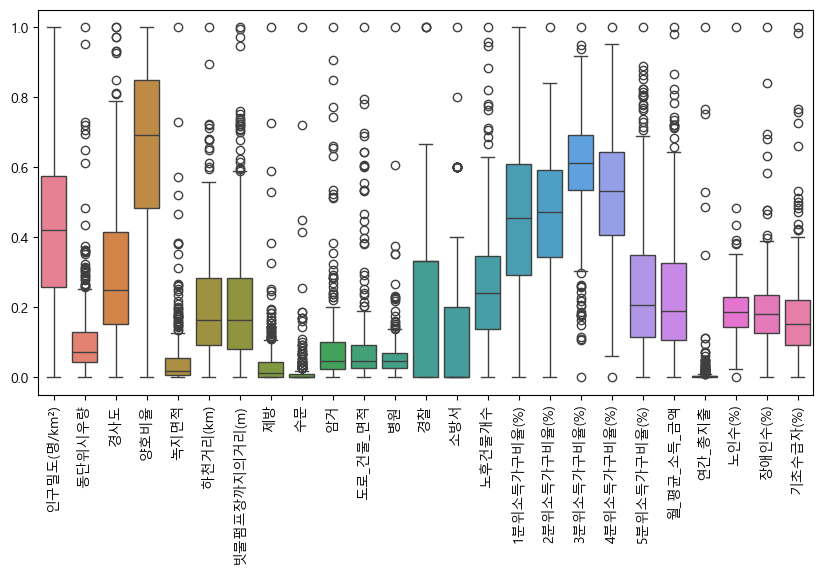

In [ ]:
# 박스플롯
feature_num=len(feature)
plt.figure(figsize=(10,5))
sb.boxplot(pre_행정동[feature])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 후진제거법
def backward_elimination(X, y, significance_level=0.1):
    included = list(X.columns)
    
    while True:
        changed = False
        model = sm.Logit(y,X[included]).fit()
        p_values = model.pvalues
        worst_feature = None
        
        for feature in included:
            if p_values[feature] > significance_level:
                if worst_feature is None or p_values[feature] > p_values[worst_feature]:
                    worst_feature = feature
        
        if worst_feature is not None:
            included.remove(worst_feature)
            changed = True
        
        if not changed:
            break
    
    model = sm.Logit(y,X[included]).fit()
    return model

In [ ]:
test=backward_elimination(y=pre_행정동[target],X=pre_행정동[feature],significance_level=0.1)

Optimization terminated successfully.
         Current function value: 0.555939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.555963
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556002
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556049
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556160
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556395
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556885
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558027
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558316
  

In [ ]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  405
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            6
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1086
Time:                        19:38:47   Log-Likelihood:                -232.19
converged:                       True   LL-Null:                       -260.47
Covariance Type:            nonrobust   LLR p-value:                 2.235e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
양호비율           0.8149      0.371      2.197      0.028       0.088       1.542
하천거리(km)      -2.2699      0.712     -3.188      0.001      -3.666      -0.874
병원             6.3685      2.805      2.271      0.023       0.871      11.866
소방서            1.8249      0.832      2.194      0.028       0.194       3.455
노후건물개수         3.2737      0.798      4.102      0.000       1.710       4.838
월_평균_소득_금액    -1.5820      0.646     -2.448      0.014      -2.848      -0.316
기초수급자(%)      -1.5938      0.958     -1.664      0.096      -3.471       0.283
==============================================================================
"""

#### 2-1. 의사결정나무

#### 2-2. Logistic Regression

In [ ]:
# 박스플롯으로 확인하기 위해 스케일링
minmax=skpre.MinMaxScaler()
minmax.fit(X=통합[행정동feature+시군구feature])

NameError: name '통합' is not defined

In [ ]:
pre_통합=통합.copy()
pre_통합[행정동feature+시군구feature]=minmax.transform(통합[행정동feature+시군구feature])

In [ ]:
test=backward_elimination(y=pre_통합[target]
                          ,X=pre_통합[행정동feature+시군구feature],significance_level=0.1)

Optimization terminated successfully.
         Current function value: 0.496884
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496924
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.497971
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498440
  

In [ ]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   침수여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1857
Time:                        12:02:43   Log-Likelihood:                -209.32
converged:                       True   LL-Null:                       -257.07
Covariance Type:            nonrobust   LLR p-value:                 9.149e-18
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
노후건물수                 4.4104      0.899      4.904      0.000       2.648       6.173
소방서                   1.6487      0.885      1.863      0.063      -0.086       3.384
계 (명)                 1.6068      0.713      2.254      0.024       0.210       3.004
노인_per                7.0805      1.111      6.375      0.000       4.903       9.257
기초생활수급자+65세이상_per    -4.9522      0.815     -6.075      0.000      -6.550      -3.354
면적당맨홀수               -2.4294      0.582     -4.171      0.000      -3.571      -1.288
면적당토실토구수             -1.7190      0.585     -2.938      0.003      -2.866      -0.572
면적당우수관거(%)            0.8375      0.461      1.816      0.069      -0.066       1.741
=====================================================================================
"""